In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.drop("Loan_ID",axis = 1,inplace = True)

In [9]:
data_map = {"Y":1,"N":0}
df["loan_status"]= df["Loan_Status"].map(data_map)
df.drop("Loan_Status",axis = 1,inplace = True)

In [10]:
df1 = pd.get_dummies(df,drop_first = True)

In [11]:
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,loan_status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1


In [12]:
df1.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
loan_status                 0
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [13]:
df1 = df1.fillna(0)

In [14]:
df1.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
loan_status                0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

<AxesSubplot:>

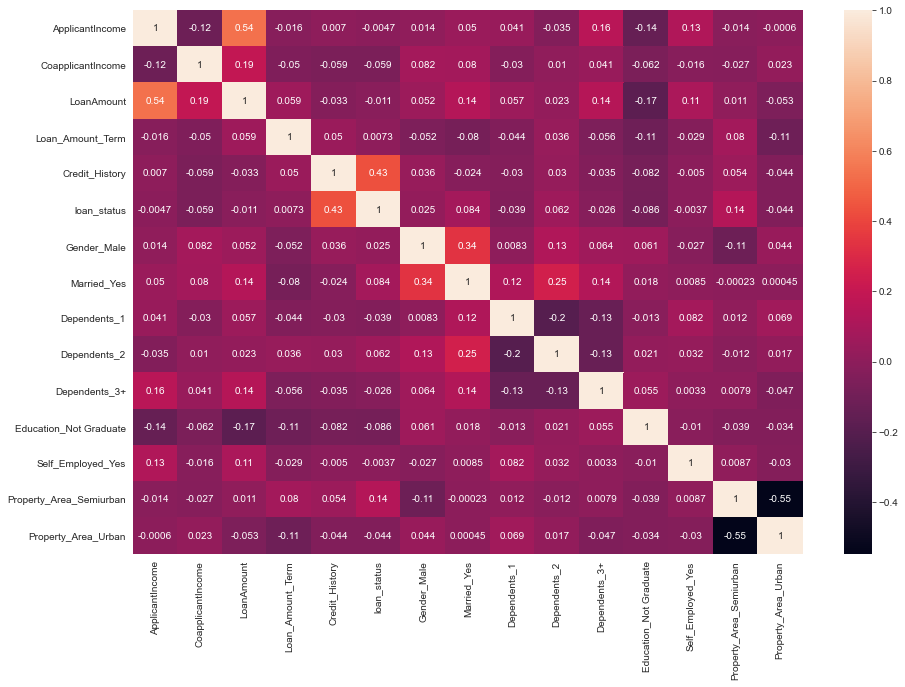

In [75]:
corr = df1.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot = True)


1    68.729642
0    31.270358
Name: loan_status, dtype: float64


Text(0.5, 1.0, 'Loan approvel rate')

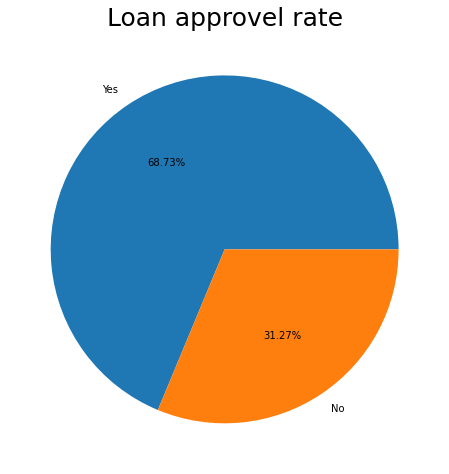

In [18]:
x = df1["loan_status"].value_counts(normalize = True)*100
print(x)
labels = x.keys().map({1:"Yes",0:"No"})

plt.figure(figsize = (8,8))
plt.pie(x,labels = labels,autopct="%1.2f%%")
plt.title("Loan approvel rate",fontsize = 25)

In [78]:
x = df1.drop("loan_status",axis = 1)
y = df1["loan_status"]

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = True)

##  Visualizing the categorical features

In [80]:
def bar_plot(variable):
    var = df[variable]
    variable_values = var.value_counts()
    
    plt.figure(figsize = (10,2))
    plt.bar(variable_values.index,variable_values)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.show()
    print("{}:\n{}".format(variable,variable_values))
    
    

In [81]:
categoricle = (df.dtypes == "object")
categoricle_list = (categoricle[categoricle].index)
print("categoricle variables")
print(categoricle_list)

categoricle variables
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


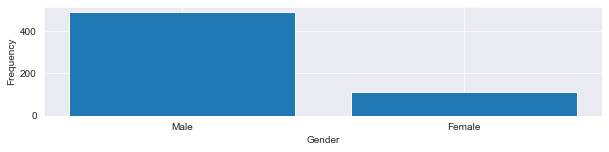

Gender:
Male      489
Female    112
Name: Gender, dtype: int64


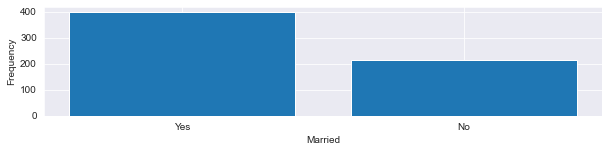

Married:
Yes    398
No     213
Name: Married, dtype: int64


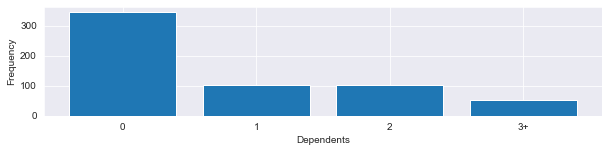

Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


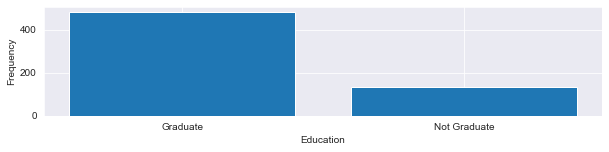

Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


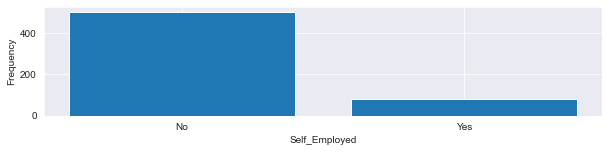

Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64


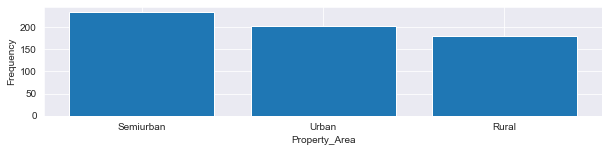

Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [82]:
sns.set_style("darkgrid")
categoricle_variables = ['Gender','Married','Dependents','Education','Self_Employed',
       'Property_Area']
for c in categoricle_list:
    bar_plot(c)

## Loan approvel rate by Education

Text(0.5, 1.0, 'Loan approvel rate by Education')

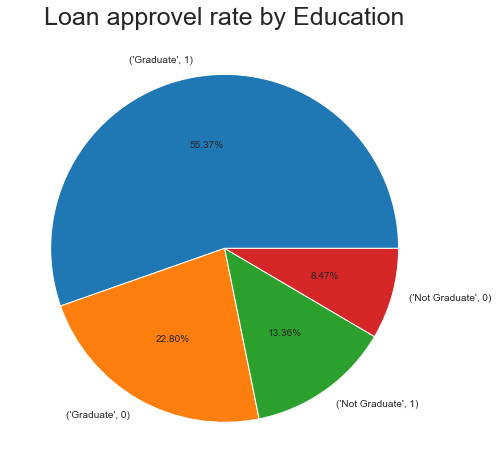

In [85]:
x = df[["Education","loan_status"]].value_counts(normalize = True)*100
label = x.keys()

plt.figure(figsize = (8,8))
plt.pie(x,labels = label , autopct = "%1.2f%%")
plt.title("Loan approvel rate by Education" , fontsize = 25)

## Loan approvel rate ny Employment type

In [86]:
x = df[["Self_Employed","loan_status"]].value_counts(normalize = True)*100
x

Self_Employed  loan_status
No             1              58.934708
               0              26.975945
Yes            1               9.621993
               0               4.467354
dtype: float64